# Modelling Housing Prices with Python

# Predicting with Machine Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
house_prices = pd.read_csv(r'C:\Users\samha\Documents\Samuel_ZroNet\Me\python\Jupyter files\House Pricing Project/train.csv')

In [4]:
house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

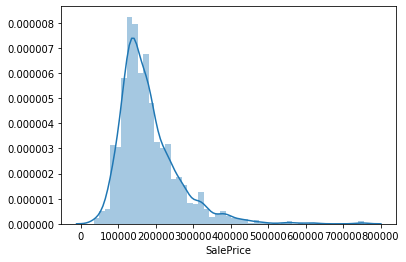

In [6]:
#plotting the SalePrices (histogram)
sns.distplot(house_prices['SalePrice'])

In [7]:
#not normal dist
#shows positive skewness and peakness

In [8]:
house_prices['SalePrice'].skew()

1.8828757597682133

In [9]:
house_prices['SalePrice'].kurt()

6.536281860064534

In [10]:
#PedroMarcelino's
print("Skewness: %f" % house_prices['SalePrice'].skew())
print("Kurtosis: %f" % house_prices['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with my 'expected' numerical values

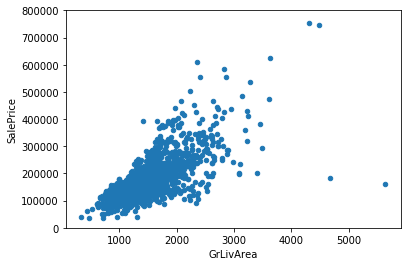

In [11]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

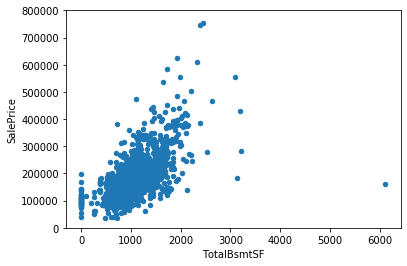

In [12]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

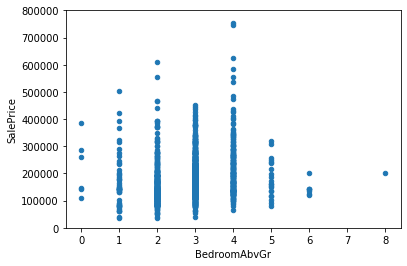

In [13]:
#scatter plot BedroomAbvGr/saleprice
var = 'BedroomAbvGr'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

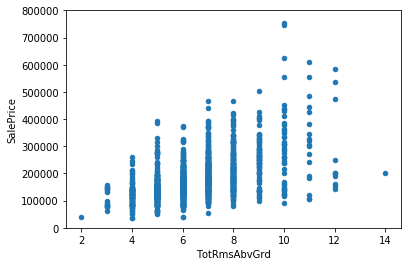

In [14]:
#scatter plot TotRmsAbvGrd/saleprice
var = 'TotRmsAbvGrd'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Relationship with my 'expected' categorical values

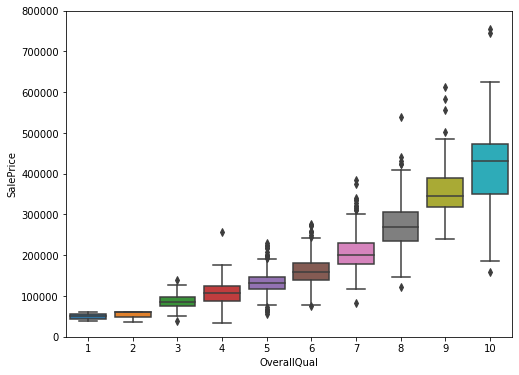

In [15]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

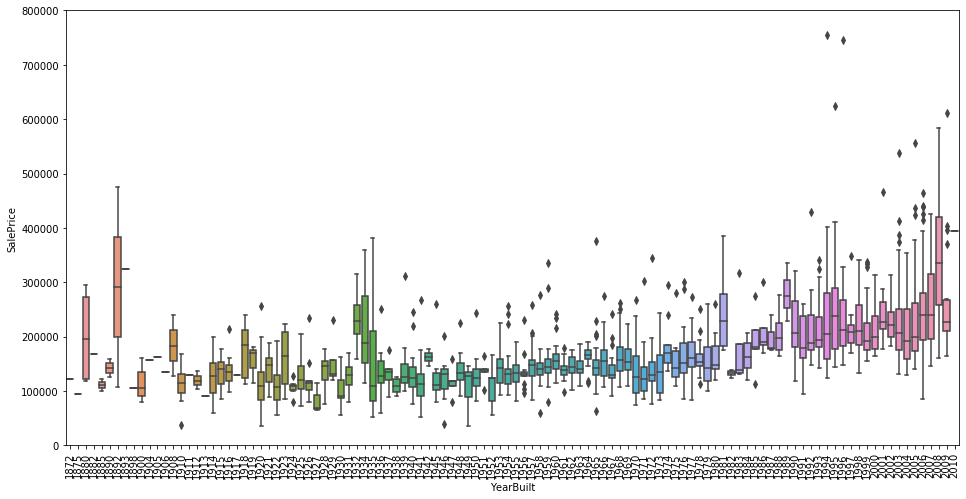

In [16]:
var = 'YearBuilt'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

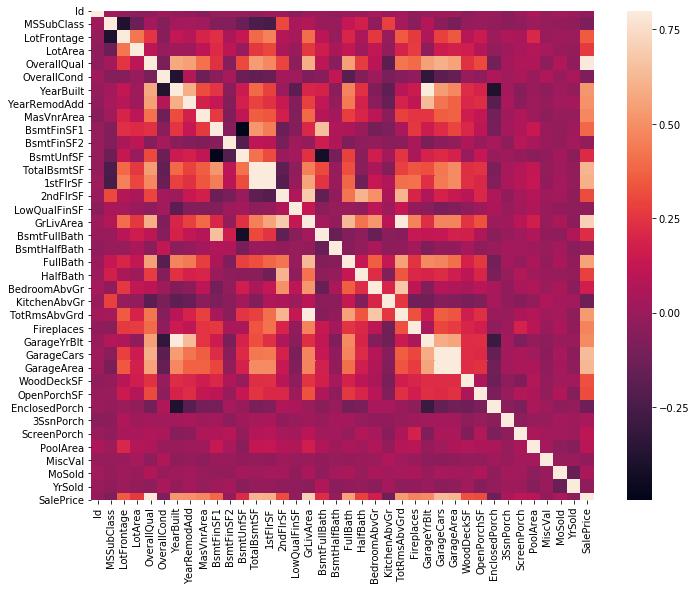

In [17]:
#PlasmaSoup
#Correlation Matrix
corrmat = house_prices.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

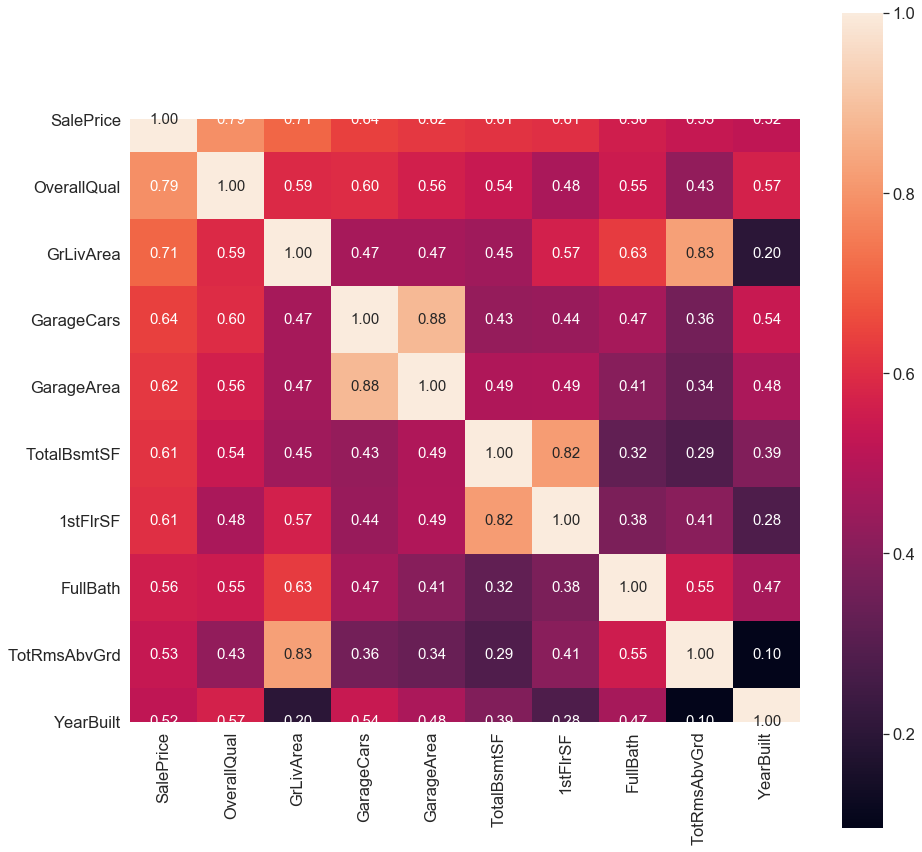

In [18]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_prices[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

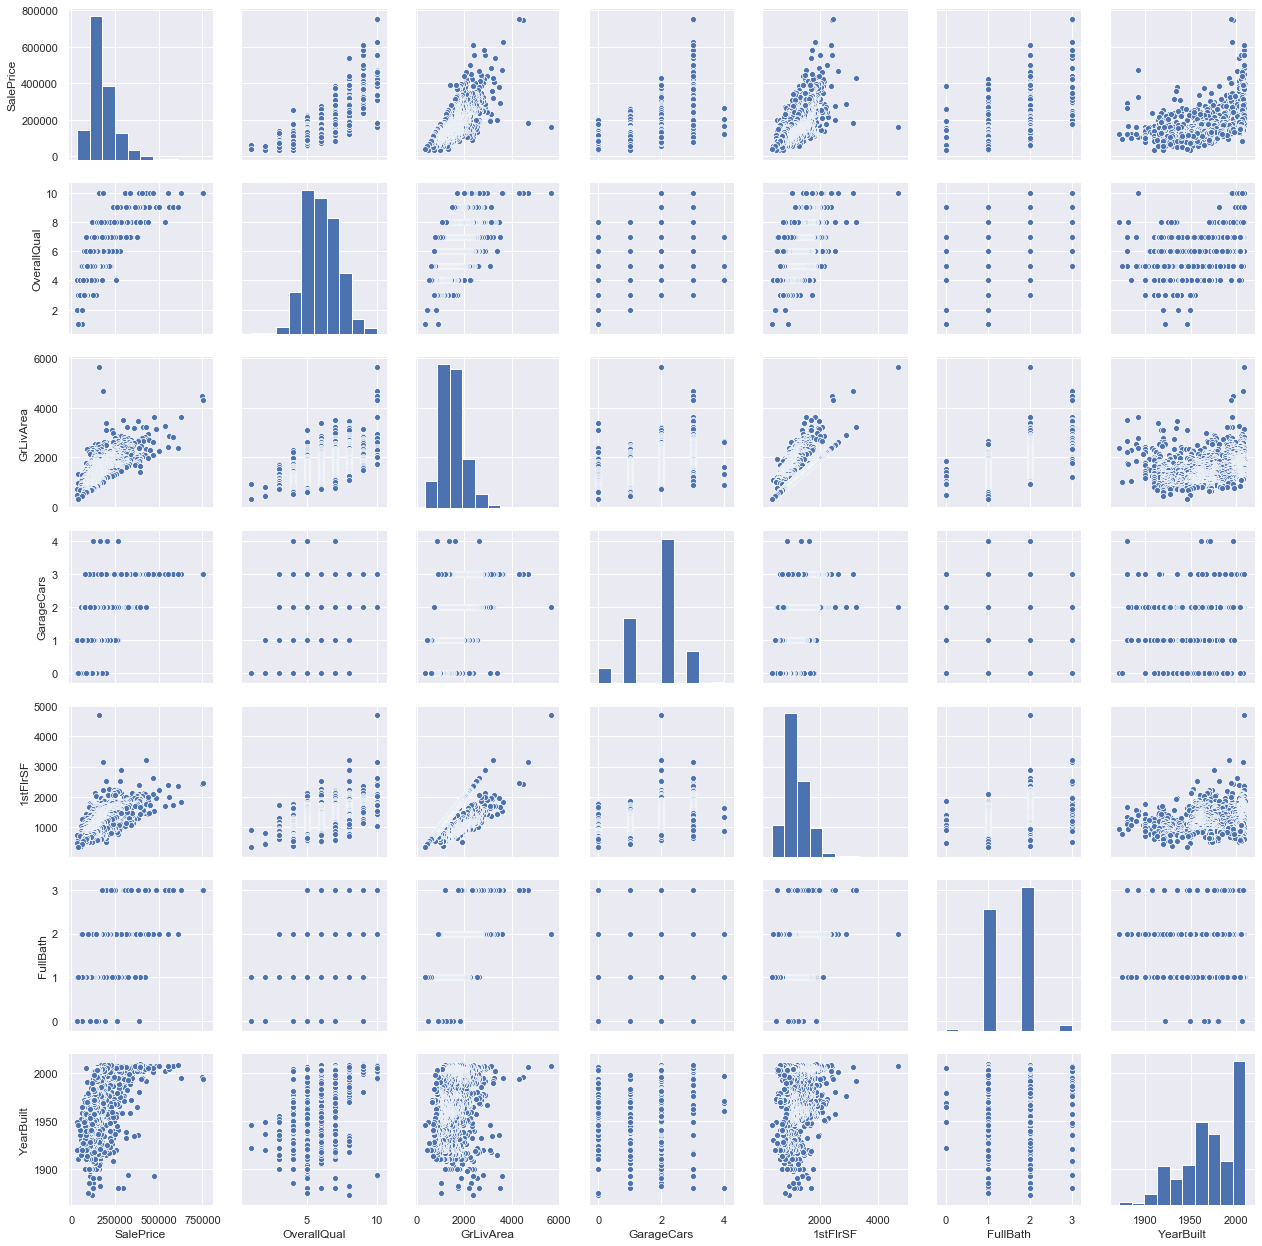

In [19]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_prices[cols], size = 2.5)
plt.show();

## Missing Data

In [20]:
#missing data
total = house_prices.isnull().sum().sort_values(ascending=False)
percent = (house_prices.isnull().sum()/house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
#dealing with missing data
house_prices = house_prices.drop((missing_data[missing_data['Total'] > 1]).index,1)
house_prices = house_prices.drop(house_prices.loc[house_prices['Electrical'].isnull()].index)
house_prices.isnull().sum().max() #just checking that there's no missing data missing...

0

# Outliers

## Univariate analysis

In [22]:
#standardizing data
#standardization means converting data values to have mean of 0 and a standard deviation of 1
saleprice_scaled = StandardScaler().fit_transform(house_prices['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## Bivariate Analysis (to discover outliers)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


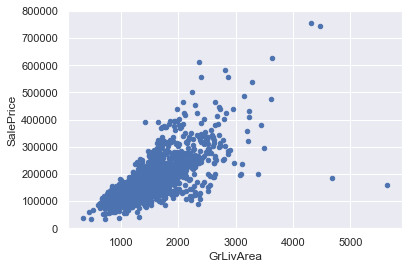

In [23]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


In [24]:
#deleting points
house_prices.sort_values(by = 'GrLivArea', ascending = False)[:2]
house_prices = house_prices.drop(house_prices[house_prices['Id'] == 1299].index)
house_prices = house_prices.drop(house_prices[house_prices['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


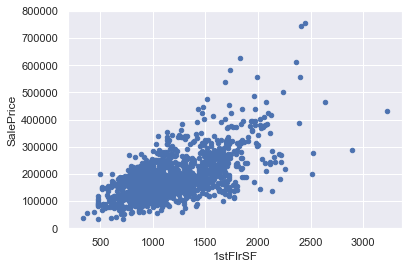

In [25]:
#bivariate analysis saleprice/grlivarea
var = '1stFlrSF'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Before Predicting CHECK FOR NORMALITY

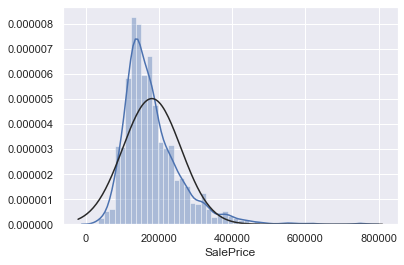

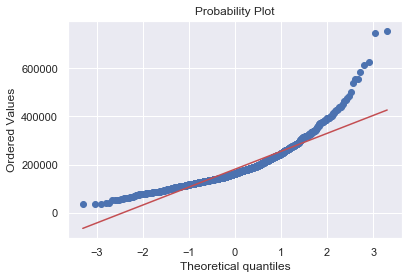

In [26]:
#histogram and normal probability plot
sns.distplot(house_prices['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['SalePrice'], plot=plt)

In [27]:
#applying log transformation
#abbraca dabbra!
#changes the data to normal dist
house_prices['SalePrice'] = np.log(house_prices['SalePrice'])

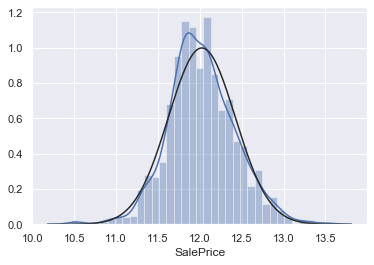

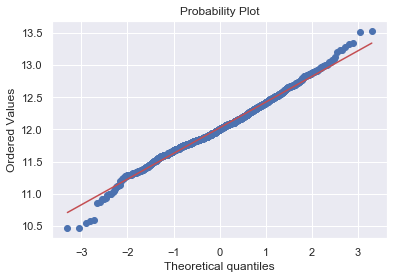

In [28]:
#transformed histogram and normal probability plot
sns.distplot(house_prices['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['SalePrice'], plot=plt)

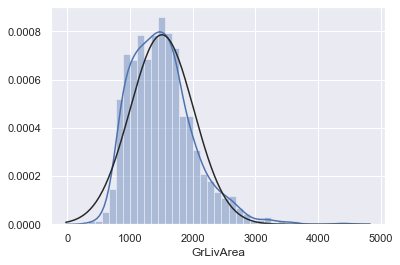

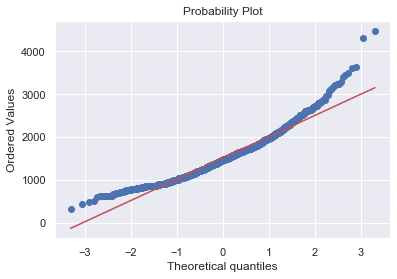

In [29]:
#histogram and normal probability plot
sns.distplot(house_prices['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['GrLivArea'], plot=plt)

In [30]:
#tastes like skewness abbraca dabbra!

In [31]:
house_prices['GrLivArea'] = np.log(house_prices['GrLivArea'])

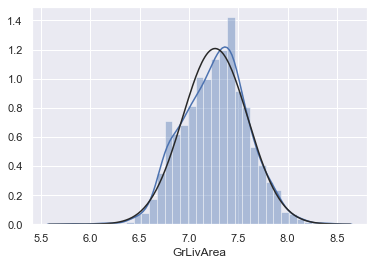

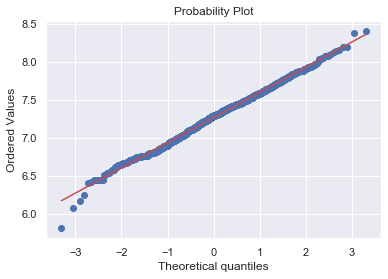

In [32]:
#transformed histogram and probability plot
sns.distplot(house_prices['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['GrLivArea'], plot=plt)

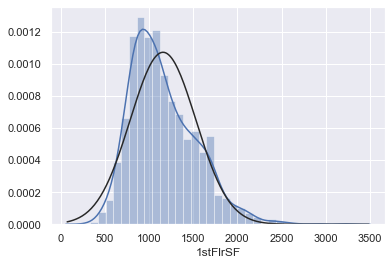

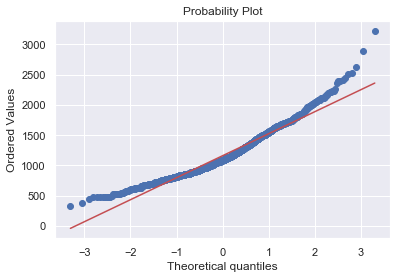

In [33]:
#histogram and normal probability plot
sns.distplot(house_prices['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['1stFlrSF'], plot=plt)

In [33]:
#tastes like skewness

In [34]:
#now log tranform the TotalBsmtSF values
house_prices['1stFlrSF'] = np.log(house_prices['1stFlrSF'])

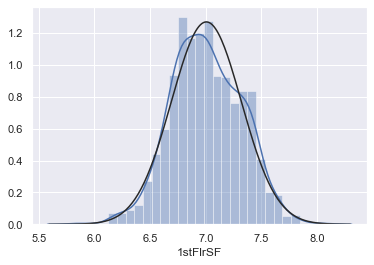

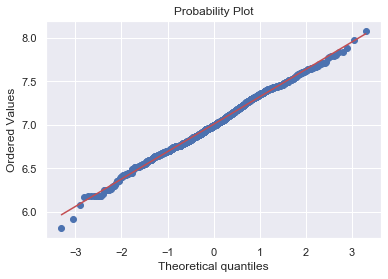

In [35]:
#transformed histogram and probability plot
sns.distplot(house_prices['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['1stFlrSF'], plot=plt)

# Homoscedasticity

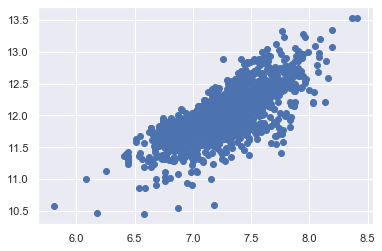

In [36]:
#scatter plot
plt.scatter(house_prices['GrLivArea'], house_prices['SalePrice']);
#no conic shape

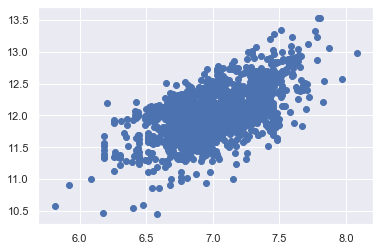

In [37]:
#scatter plot
plt.scatter(house_prices['1stFlrSF'], house_prices['SalePrice']);

In [38]:
#We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of '1stFlrSF'. Cool!

In [39]:
#last
#convert categorical variable into dummy
house_prices = pd.get_dummies(house_prices)

In [40]:
house_prices.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2,1183,60,15623,10,5,1996,1996,2096,0,300,...,0,0,0,1,1,0,0,0,0,0
3,692,60,21535,10,6,1994,1995,1455,0,989,...,0,0,0,1,0,0,0,0,1,0
4,1170,60,35760,10,5,1995,1996,1387,0,543,...,0,0,0,1,0,0,0,0,1,0
5,186,75,22950,10,9,1892,1993,0,0,1107,...,0,0,0,1,0,0,0,0,1,0
6,305,75,18386,7,9,1880,2002,0,0,1470,...,0,0,0,1,0,0,0,0,1,0
7,1269,50,14100,8,9,1935,1997,192,0,536,...,0,0,0,1,0,0,0,0,1,0
8,636,190,10896,6,7,1914,1995,256,0,1184,...,0,0,0,1,1,0,0,0,0,0
9,770,60,53504,8,5,2003,2003,1416,0,234,...,0,0,0,1,0,0,0,0,1,0
10,1354,50,14720,8,5,1995,1996,816,0,1217,...,0,0,0,1,0,0,0,0,1,0
11,497,20,12692,8,5,1992,1993,1231,0,1969,...,0,0,0,1,0,0,0,0,1,0


In [41]:
#starting my random forest prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [42]:
y = house_prices.SalePrice
houseprices_features = ['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'YearBuilt']
X = house_prices[houseprices_features]

In [43]:
y.describe()

count    1457.000000
mean       12.024005
std         0.399853
min        10.460242
25%        11.774520
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [45]:
X_train.describe()

,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,YearBuilt
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,6.089744,7.263845,1.755495,7.001335,1.558608,1970.761905
std,1.362455,0.333553,0.745114,0.320320,0.549351,30.269672
min,1.000000,5.811141,0.000000,5.811141,0.000000,1872.000000
25%,5.000000,7.030857,1.000000,6.772508,1.000000,1952.000000
50%,6.000000,7.290975,2.000000,6.982863,2.000000,1972.000000
75%,7.000000,7.482119,2.000000,7.230744,2.000000,2000.000000
max,10.000000,8.406485,4.000000,8.079618,3.000000,2010.000000


In [46]:
houseprice_model = RandomForestRegressor(criterion='mae', random_state=1)

In [47]:
#no missing values

In [48]:
houseprice_model.fit(X_train, y_train)
#ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
#mistake was: still using 'TotalBsmtSF' when we changed it to 'HasBsmt' to avoid the zeros

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [50]:
preds = houseprice_model.predict(X_val)
print(preds)

[11.86617786 12.47942626 11.80794241 11.6864911  11.68437432 12.08467729
 11.82163898 11.75748495 12.96023326 11.93437576 11.77478376 11.36513952
 11.78348023 12.464015   11.85146155 12.33613606 11.70372802 12.14564905
 11.8798031  12.07107749 11.83694034 12.09018445 11.76026368 11.8788922
 11.9866601  11.7692935  11.68669728 12.04641539 12.05663829 11.78815298
 12.22306854 11.7869487  12.16146612 12.03261207 12.43810942 11.46930118
 12.20178895 11.7822633  12.19222886 11.99394798 11.76841353 11.96682987
 13.13005942 12.30353554 12.24139073 11.55678131 11.65586284 12.62236723
 12.7272764  11.67027505 12.08997374 11.57583739 11.95028694 11.88858343
 11.90651557 12.72922098 11.86982088 11.69734369 12.60154632 11.85187408
 12.72279942 12.13701441 11.74472709 11.87645049 12.11826712 11.71741172
 12.49291185 12.14909685 11.92543223 12.63678502 12.72529655 12.03705038
 11.87591996 12.20551828 12.40524763 12.0673647  11.92006036 11.00286087
 11.93249494 11.98228278 11.99994973 12.15079304 11.

In [52]:
print(mean_absolute_error(y_val, preds))

0.12021968441295786


In [53]:
#OKAY SO WOAHHHHH

# Predicting Test Data

In [54]:
test_path = (r'C:\Users\samha\Documents\Samuel_ZroNet\Me\python\Jupyter files\House Pricing Project\test.csv')
test_data = pd.read_csv(test_path)

In [55]:
test_X = test_data[houseprices_features]

In [60]:
total = test_X.isnull().sum().sort_values(ascending=False)
percent = (test_X.isnull().sum()/test_X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
GarageCars,1,0.000685
YearBuilt,0,0.000000
FullBath,0,0.000000
1stFlrSF,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000


In [61]:
#replacing the missing value in the test data with the mean
test_X['GarageCars'].fillna((test_X['GarageCars'].mean()), inplace=True)

In [62]:
test_preds = houseprice_model.predict(test_X)

In [63]:
print(test_preds)

[12.11431819 12.18105446 12.03265984 ... 12.18729034 12.00112533
 12.48604905]


In [64]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('final_submission.csv', index=False)